In [1]:
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

import tensorflow as tf
from tflite_model_maker import model_spec
from tflite_model_maker.config import QuantizationConfig

import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = DataLoader.from_folder('tmp/Medicinal-Leaf-Images')
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 1835, num_label: 30, labels: Alpinia Galanga (Rasna), Amaranthus Viridis (Arive-Dantu), Artocarpus Heterophyllus (Jackfruit), Azadirachta Indica (Neem), Basella Alba (Basale), Brassica Juncea (Indian Mustard), Carissa Carandas (Karanda), Citrus Limon (Lemon), Ficus Auriculata (Roxburgh fig), Ficus Religiosa (Peepal Tree), Hibiscus Rosa-sinensis, Jasminum (Jasmine), Mangifera Indica (Mango), Mentha (Mint), Moringa Oleifera (Drumstick), Muntingia Calabura (Jamaica Cherry-Gasagase), Murraya Koenigii (Curry), Nerium Oleander (Oleander), Nyctanthes Arbor-tristis (Parijata), Ocimum Tenuiflorum (Tulsi), Piper Betle (Betel), Plectranthus Amboinicus (Mexican Mint), Pongamia Pinnata (Indian Beech), Psidium Guajava (Guava), Punica Granatum (Pomegranate), Santalum Album (Sandalwood), Syzygium Cumini (Jamun), Syzygium Jambos (Rose Apple), Tabernaemontana Divaricata (Crape Jasmine), Trigonella Foenum-graecum (Fenugreek).


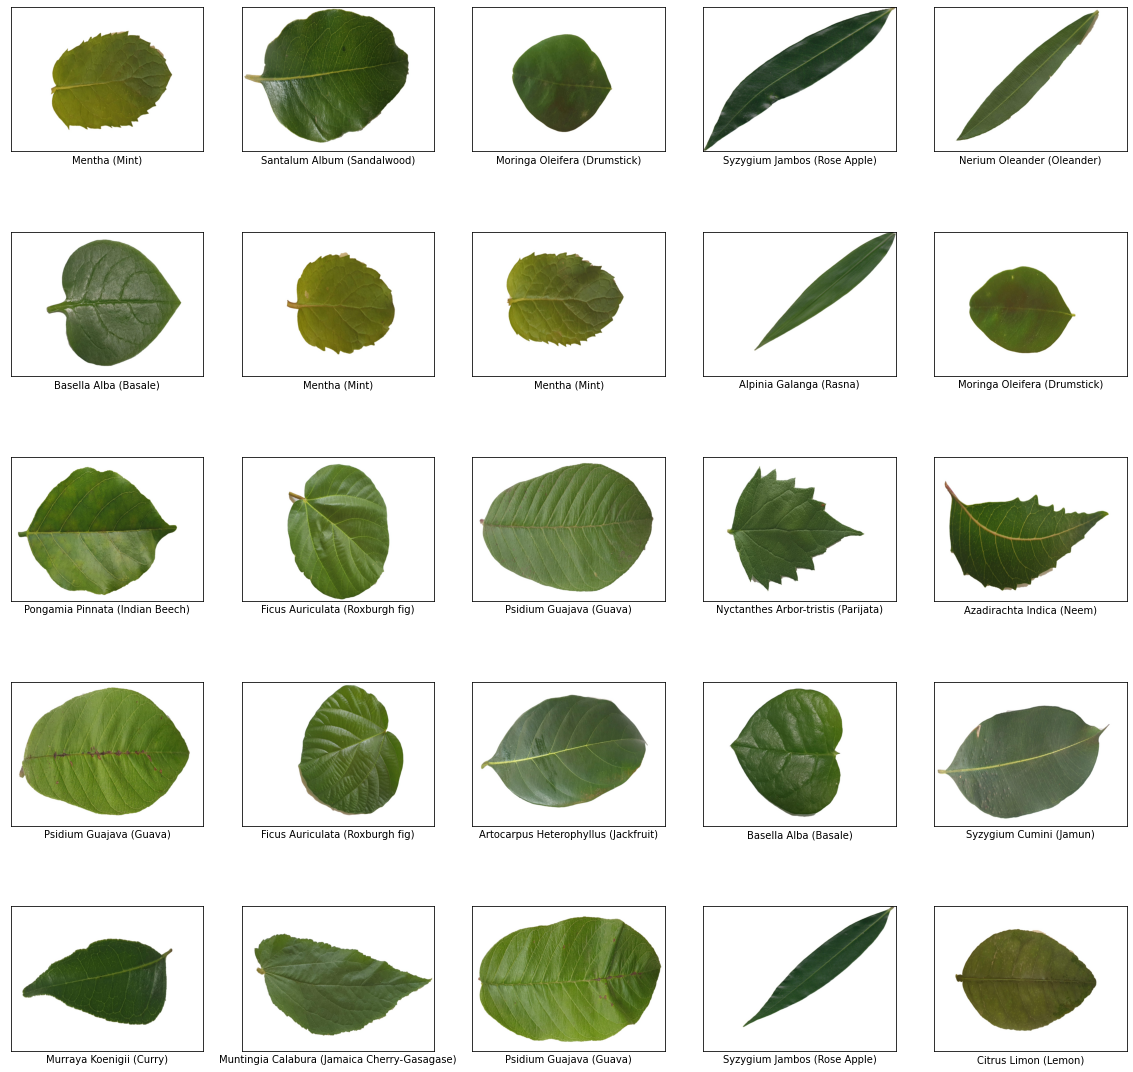

In [3]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [4]:
model = image_classifier.create(train_data, 
                                epochs=15,
                                use_augmentation=True,
                                dropout_rate=0.2)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                38430     
Total params: 3,451,454
Trainable params: 38,430
Non-trainable params: 3,413,024
_________________________________________________________________
None
INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use default resize_bicubic.


INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15
51/51 [==============================] - 45s 814ms/step - loss: 2.8488 - accuracy: 0.2978
Epoch 2/15
51/51 [==============================] - 45s 874ms/step - loss: 1.8113 - accuracy: 0.6961
Epoch 3/15
51/51 [==============================] - 47s 929ms/step - loss: 1.4700 - accuracy: 0.8119
Epoch 4/15
51/51 [==============================] - 47s 922ms/step - loss: 1.3357 - accuracy: 0.8346
Epoch 5/15
51/51 [==============================] - 47s 927ms/step - loss: 1.2716 - accuracy: 0.8591
Epoch 6/15
51/51 [==============================] - 48s 947ms/step - loss: 1.1999 - accuracy: 0.8781
Epoch 7/15
51/51 [==============================] - 48s 945ms/step - loss: 1.1637 - accuracy: 0.8836
Epoch 8/15
51/51 [==============================] - 47s 920ms/step - loss: 1.1492 - accuracy: 0.8909
Epoch 9/15
51/51 [==============================] - 46s 905ms/step - loss: 1.1190 - accuracy: 0.9020
Epoch 10/15
51/51 [==============================] - 48s 935ms/step - loss: 1.0832 - accura

In [5]:
loss, accuracy = model.evaluate(test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


6/6 [==============================] - 8s 691ms/step - loss: 0.8433 - accuracy: 0.9946


In [6]:
config = QuantizationConfig.for_float16()

In [7]:
model.export(export_dir='tmp', tflite_filename='MedicineLeaf.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: C:\Users\andre\AppData\Local\Temp\tmp54yha2sf\assets


INFO:tensorflow:Assets written to: C:\Users\andre\AppData\Local\Temp\tmp54yha2sf\assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\andre\AppData\Local\Temp\tmp56ijnd_d\labels.txt


INFO:tensorflow:Saving labels in C:\Users\andre\AppData\Local\Temp\tmp56ijnd_d\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: tmp\MedicineLeaf.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: tmp\MedicineLeaf.tflite


In [8]:
model.evaluate_tflite('tmp/MedicineLeaf.tflite', test_data)

INFO:tensorflow:Use customized resize method bilinear


INFO:tensorflow:Use customized resize method bilinear


{'accuracy': 0.9945652173913043}